<a href="https://colab.research.google.com/github/aliceperuniz/IP-Python_Lists/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Airbnb

### **Objetivo:**
- Construir um modelo de previsão de preço a ser cobrado por airbnbs no Rio de Janeiro.
- Pode ser usado como consulta tanto pelos clientes quanto pelos donos de estabelecimentos a serem colocados para alugar.

### **Expectativas Iniciais:**
- Valores tendem a variar de acordo com a época do ano.
- Influência da localidade exata do airbnb
- Adicionais/Comodidade podem ter impacto no valor.

## Importação e leitura de dados:

In [2]:
import pandas as pd
import os
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!unzip '/content/dataset.zip'



Archive:  /content/dataset.zip
  inflating: dataset/abril2018.csv   
  inflating: dataset/abril2019.csv   
  inflating: dataset/abril2020.csv   
  inflating: dataset/agosto2018.csv  
  inflating: dataset/agosto2019.csv  
  inflating: dataset/dezembro2018.csv  
  inflating: dataset/dezembro2019.csv  
  inflating: dataset/fevereiro2019.csv  
  inflating: dataset/fevereiro2020.csv  
  inflating: dataset/janeiro2019.csv  
  inflating: dataset/janeiro2020.csv  
  inflating: dataset/julho2018.csv   
  inflating: dataset/julho2019.csv   
  inflating: dataset/junho2019.csv   
  inflating: dataset/maio2018.csv    
  inflating: dataset/maio2019.csv    
  inflating: dataset/maio2020.csv    
  inflating: dataset/maro2019.csv    
  inflating: dataset/maro2020.csv    
  inflating: dataset/novembro2019.csv  
  inflating: dataset/novrmbro2018.csv  
  inflating: dataset/outubro2018.csv  
  inflating: dataset/outubro2019.csv  
  inflating: dataset/setembro2018.csv  
  inflating: dataset/setembro2019.csv

## Consolidando Base de Dados

In [64]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, "mai": 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}
caminho_bases = pathlib.Path('/content/dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
  nome_do_mes = arquivo.name[:3]
  mes = meses[nome_do_mes]

  ano = arquivo.name[-8:]
  ano = int(ano.replace('.csv', ''))

  df = pd.read_csv(caminho_bases / arquivo.name)
  df['ano'] = ano
  df['mes'] = mes

  base_airbnb = pd.concat([base_airbnb, df], ignore_index=True)

display(base_airbnb)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,17878,https://www.airbnb.com/rooms/17878,20181214040116,2018-12-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24480,https://www.airbnb.com/rooms/24480,20181214040116,2018-12-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25026,https://www.airbnb.com/rooms/25026,20181214040116,2018-12-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31560,https://www.airbnb.com/rooms/31560,20181214040116,2018-12-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34608,https://www.airbnb.com/rooms/34608,20181214040116,2018-12-14,São-Conrado House with Ocean View,NaN,Its a House inside a very good condo with 2...,Its a House inside a very good condo with 2...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,25138322,https://www.airbnb.com/rooms/25138322,20180517125422,2018-05-19,brand large flat on the beach,Direttamente sulla spiaggia nella parte miglio...,This luxury Rio apartment is located 50 meter...,This luxury Rio apartment is located 50 meter...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902206,25138741,https://www.airbnb.com/rooms/25138741,20180517125422,2018-05-18,Beleza Natural mansão dos sonhos,Momentos inesquecíveis você só concegue no bel...,NaN,Momentos inesquecíveis você só concegue no bel...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902207,25140185,https://www.airbnb.com/rooms/25140185,20180517125422,2018-05-18,Apartamento 615,Apartamento muito simples mais com utensílios ...,NaN,Apartamento muito simples mais com utensílios ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902208,25141852,https://www.airbnb.com/rooms/25141852,20180517125422,2018-05-18,Lindo Copacabana a 100 metros da praia!,"Apartamento Lindo em Copacabana, fica a 100 me...",NaN,"Apartamento Lindo em Copacabana, fica a 100 me...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Excluindo colunas desnecessárias
Além denão precisarmos de muitas das colunas do dataset, a exclusão das mesmas farão o modelo ficar menos lento.

Tipos de colunas a serem excluídos:

1. ID's e Links externos
2. Colunas com informações redundantes
3. Colunas com texto livre
4. Colunas em que os valores das células são quase todos iguais (não vai fazer muita diferença na análise do modelo).


In [6]:
print(base_airbnb.columns)
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object', length=108)


In [7]:
print(base_airbnb['experiences_offered'].value_counts())

experiences_offered
none    902210
Name: count, dtype: int64


In [8]:
print((base_airbnb['host_listings_count'] == base_airbnb['host_total_listings_count']).value_counts())

True     901750
False       460
Name: count, dtype: int64


Colunas finais:

In [9]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','neighbourhood','latitude','longitude','property_type','room_type','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,within an hour,100%,f,2.0,Copacabana,-22.965919,-43.178962,Condominium,Entire home/apt,1.0,...,9.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2018,12
1,NaN,NaN,f,1.0,Ipanema,-22.985698,-43.201935,Apartment,Entire home/apt,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2018,12
2,within a day,100%,f,3.0,Copacabana,-22.977117,-43.190454,Apartment,Entire home/apt,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2018,12
3,within an hour,100%,t,1.0,Ipanema,-22.983024,-43.214270,Apartment,Entire home/apt,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2018,12
4,within an hour,95%,f,8.0,NaN,-22.998669,-43.271372,House,Entire home/apt,4.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,NaN,NaN,f,5.0,Copacabana,-22.981855,-43.189439,Apartment,Entire home/apt,3.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2018,5
902206,within a day,71%,f,17.0,Barra da Tijuca,-22.982703,-43.403362,Casa particular (Cuba),Entire home/apt,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2018,5
902207,within an hour,100%,f,4.0,Copacabana,-22.975042,-43.189856,Apartment,Private room,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2018,5
902208,NaN,NaN,f,1.0,Copacabana,-22.983718,-43.190023,Apartment,Entire home/apt,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2018,5


### Tratando valores nulos

In [10]:
# Excluindo colunas

for coluna in base_airbnb:
  if base_airbnb[coluna].isnull().sum() > 300000:
    base_airbnb = base_airbnb.drop(coluna, axis=1)

print(base_airbnb.isnull().sum())

host_is_superhost             460
host_listings_count           460
neighbourhood               58077
latitude                        0
longitude                       0
property_type                   0
room_type                       0
bathrooms                    1724
bedrooms                      850
beds                         2502
bed_type                        0
amenities                       0
price                           0
guests_included                 0
extra_people                    0
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
ano                             0
mes                             0
dtype: int64


In [11]:
# Excluindo linhas nulas:

base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(840146, 23)
host_is_superhost           0
host_listings_count         0
neighbourhood               0
latitude                    0
longitude                   0
property_type               0
room_type                   0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


### Verificando tipos de dados de cada coluna

In [12]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
neighbourhood                object
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

In [13]:
# Ajustando os tipos das colunas "price" e "extra people":

base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
neighbourhood                object
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


## Análise exploratória e Tratando Outliers

Vamos basicamente olhar feature por feature para:
1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
2. Excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5x Amplitude e valores acima de Q3 + 1.5x Amplitude). Amplitude = Q3 - Q1
3. Confirmar se todas as features que temos fazem sentido para o nosso modelo ou se alguma delas não vai nos ajudar e se devemos excluir.

Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.

Depois vamos analisar as colunas de valores numéricos discretos (accommodates, bedrooms, guests_included, etc.)

Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.


<Axes: >

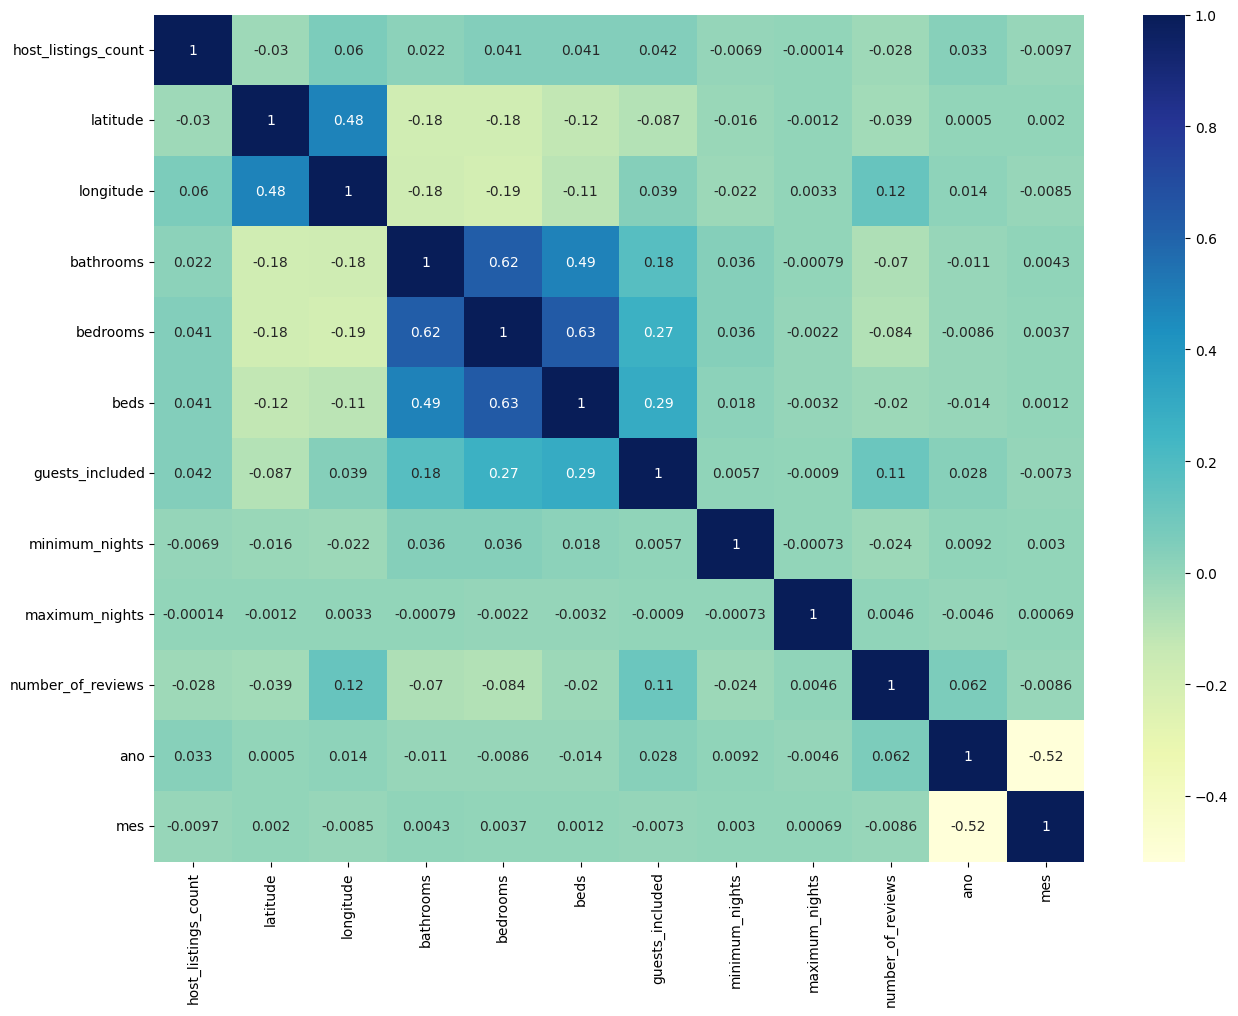

In [14]:
base_airbnb_numeric = base_airbnb.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 11))
sns.heatmap(base_airbnb_numeric.corr(), annot=True, cmap='YlGnBu')

# print(base_airbnb_numeric.corr())

### Definição de Funções para Análise de Outliers

In [17]:
def limites(coluna):
  q1 = coluna.quantile(0.25)
  q3 = coluna.quantile(0.75)
  amplitude = q3 - q1
  limite_inferior = q1 - 1.5 * amplitude
  limite_superior = q3 + 1.5 * amplitude

  return limite_inferior, limite_superior

def excluir_outliers(df, nome_coluna):
  qtde_linhas = df.shape[0]
  limite_inferior, limite_superior = limites(df[nome_coluna])
  df = df.loc[(df[nome_coluna] >= limite_inferior) & (df[nome_coluna] <= limite_superior), :]
  linhas_removidas = qtde_linhas - df.shape[0]

  return df, linhas_removidas


In [18]:
# Ex teste
print(limites(base_airbnb['price']))

base_airbnb['price'].describe()

(-521.5, 1274.5)


,price
count,840146.000000
mean,649.823364
std,1693.430786
min,0.000000
25%,152.000000
50%,298.000000
75%,601.000000
max,138262.000000


In [19]:
def diagrama_caixa(coluna):
  fig, (ax1,ax2) = plt.subplots(1, 2)
  fig.set_size_inches(15, 5)

  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limites(coluna))
  sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
  plt.figure(figsize=(15, 10))
  sns.displot(data=base_airbnb, x=coluna, kde=True, height=4, aspect=2)

def grafico_barra(coluna):
  plt.figure(figsize=(15, 5))
  ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
  ax.set_xlim(limites(coluna))

### Análise de **'price'**

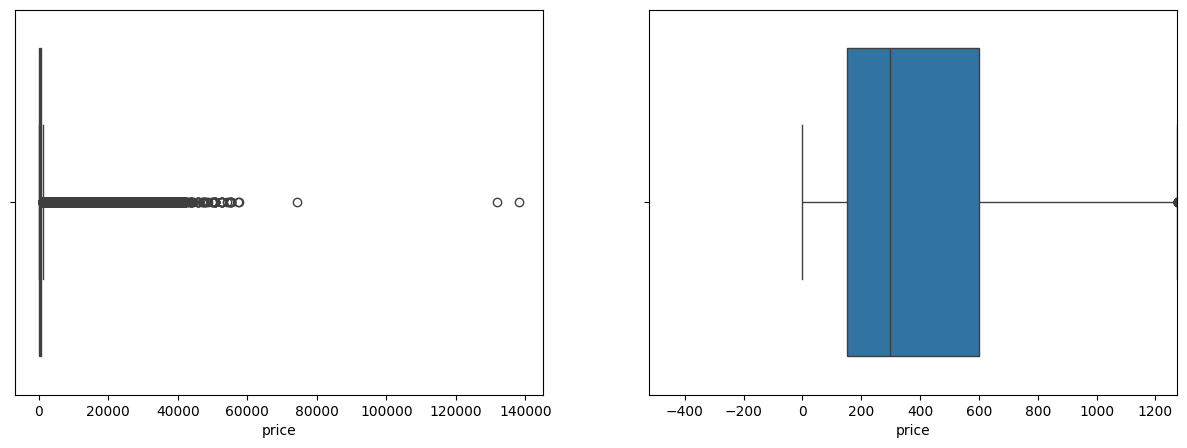

<Figure size 1500x1000 with 0 Axes>

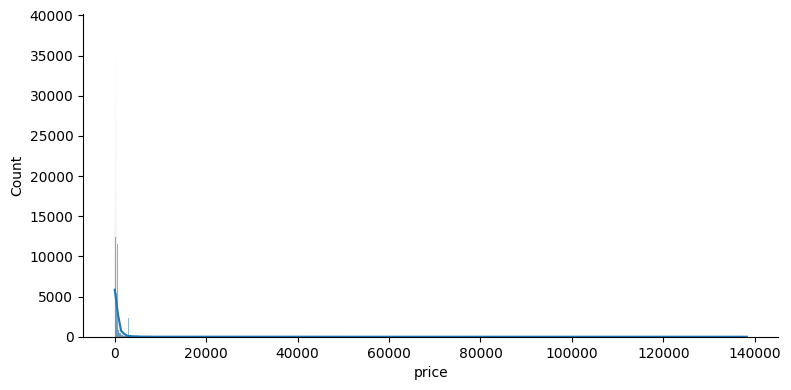

In [20]:
diagrama_caixa(base_airbnb['price'])

histograma(base_airbnb['price'])

In [21]:
# Excluindo Outliers muito extremos (preços altíssimos que fogem demais da média). Quero focar nos imóveis comuns, e não de altíssimo luxo.

base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print(f'{linhas_removidas} linhas foram removidas')


82154 linhas foram removidas


<Figure size 1500x1000 with 0 Axes>

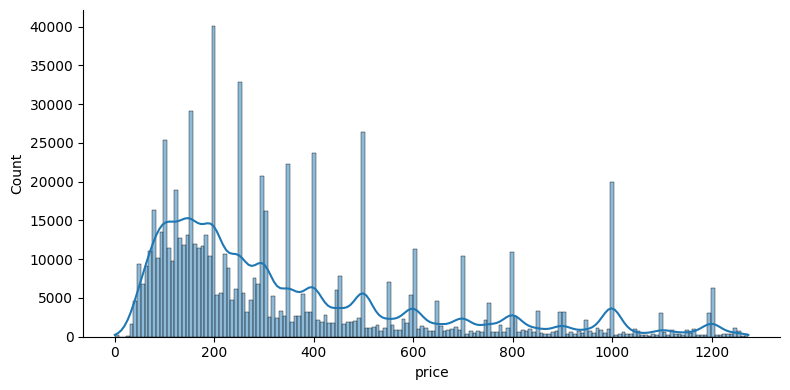

In [22]:
histograma(base_airbnb['price'])


### Análise de **'extra-people'**

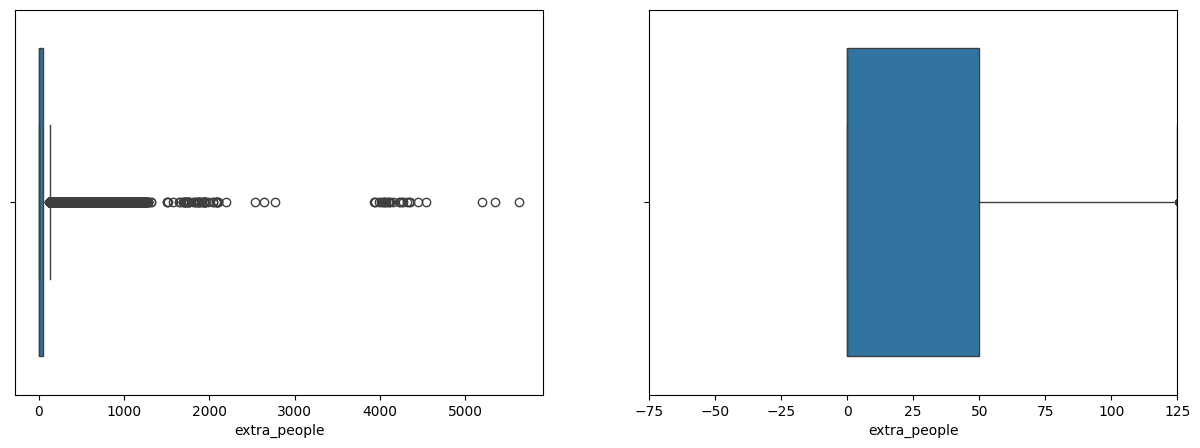

<Figure size 1500x1000 with 0 Axes>

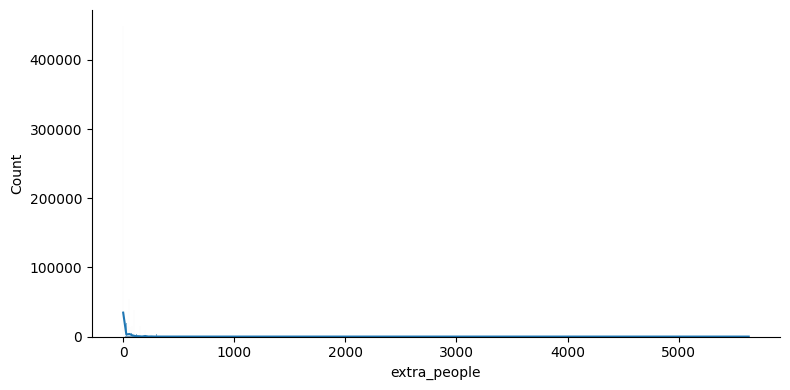

In [23]:
diagrama_caixa(base_airbnb['extra_people'])

histograma(base_airbnb['extra_people'])

In [24]:
# Excluindo Outliers de extra_people

base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print(f'{linhas_removidas} linhas foram removidas')


55641 linhas foram removidas


<Figure size 1500x1000 with 0 Axes>

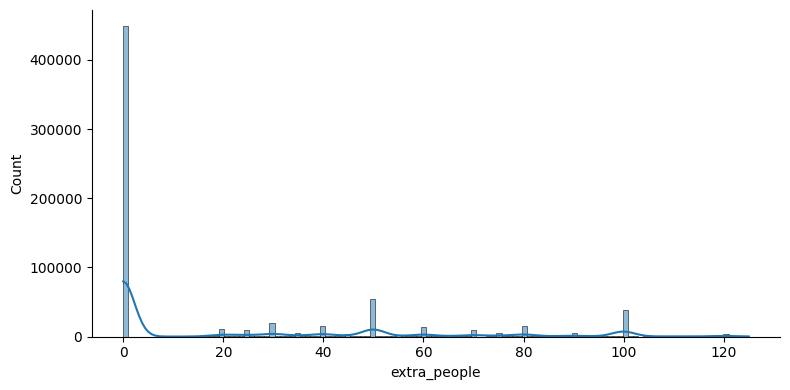

In [25]:
histograma(base_airbnb['extra_people'])

### Análise de **'host_listings_count':**

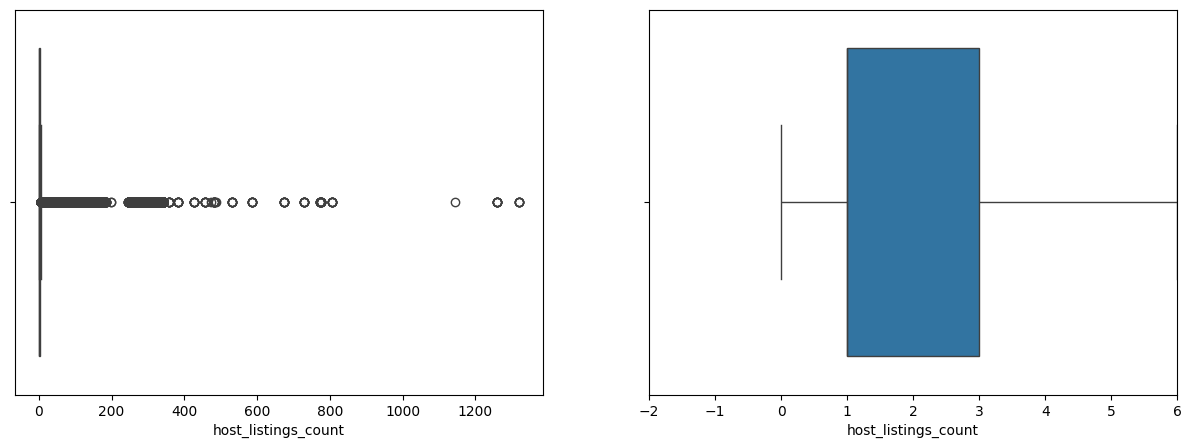

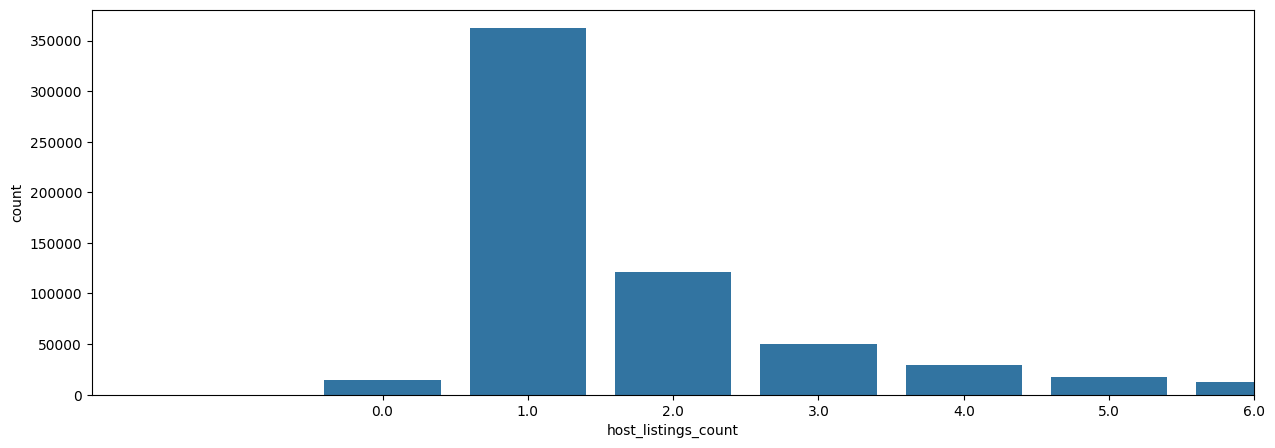

In [26]:
diagrama_caixa(base_airbnb['host_listings_count'])

grafico_barra(base_airbnb['host_listings_count'])

In [27]:
# podemos excluir os outliers, porque hosts com mais de 6 imóveis não fazem parte do nosso público alvo.

base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print(f'{linhas_removidas} linhas foram removidas')

94138 linhas foram removidas


### Análise de **'bathrooms':**

<Axes: xlabel='bathrooms', ylabel='count'>

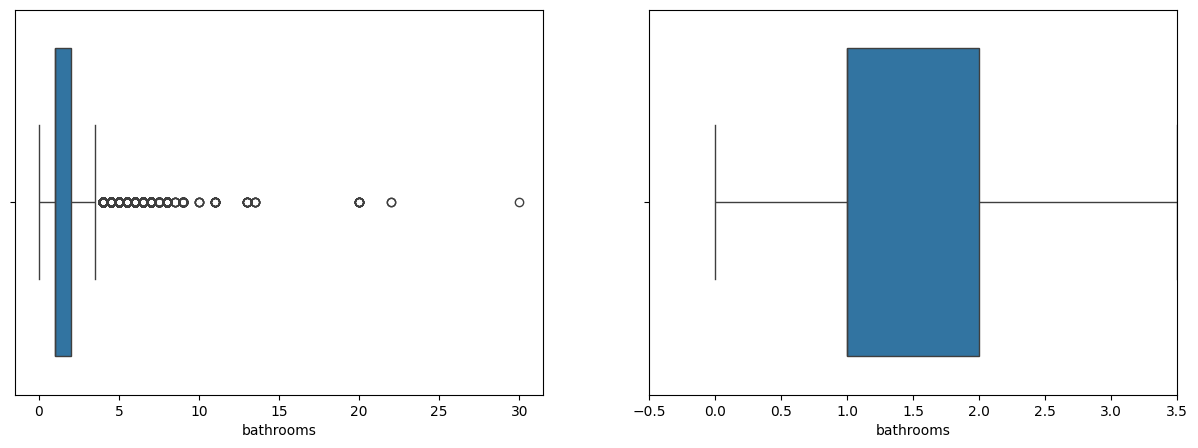

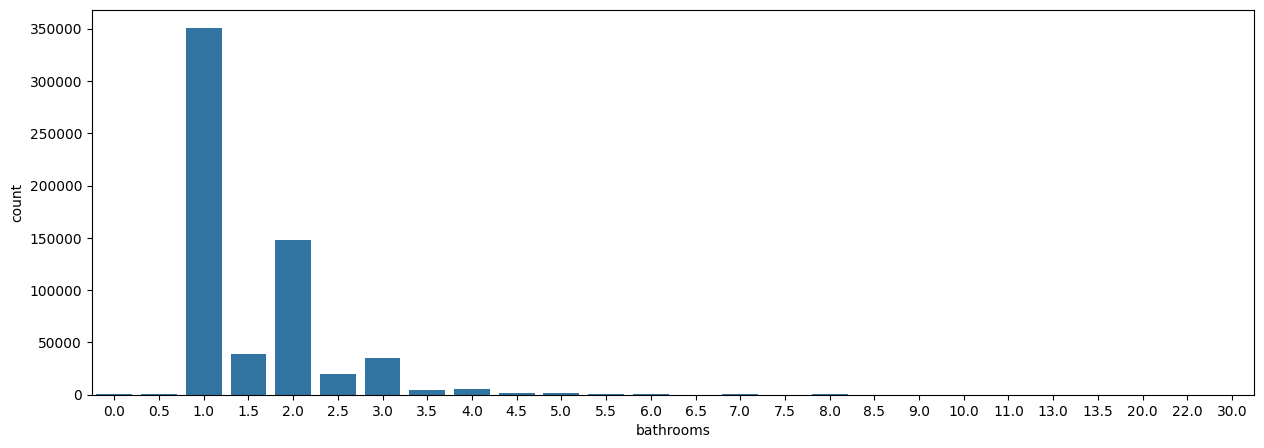

In [28]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

In [29]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print(f'{linhas_removidas} linhas foram removidas')

9216 linhas foram removidas


### Análise de **'bedrooms':**

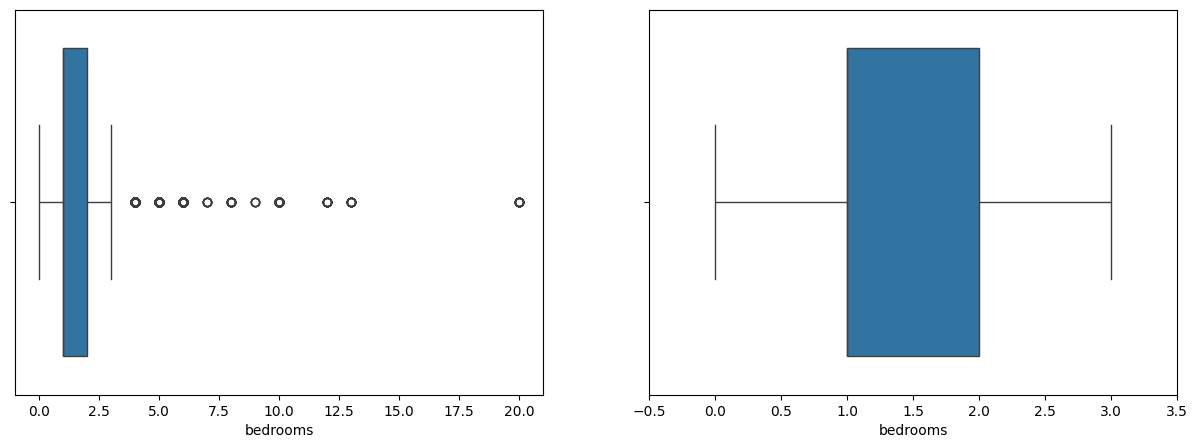

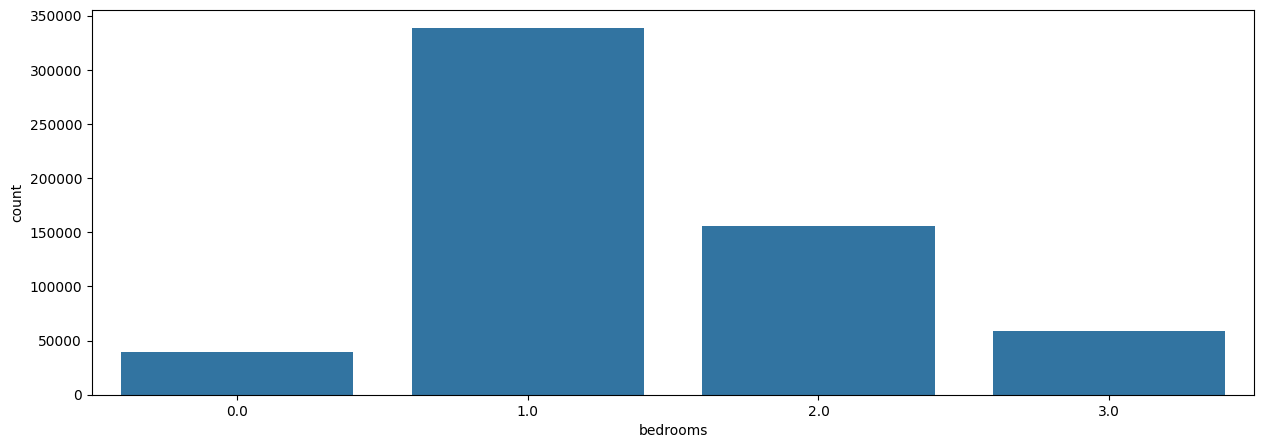

In [30]:
diagrama_caixa(base_airbnb['bedrooms'])

grafico_barra(base_airbnb['bedrooms'])

In [31]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print(f'{linhas_removidas} linhas foram removidas')

7126 linhas foram removidas


### Análise de **'beds':**

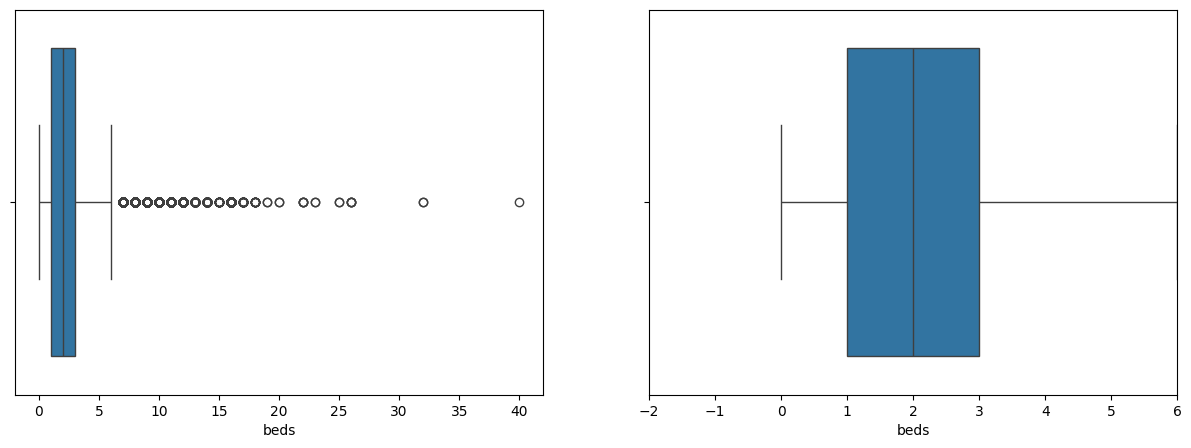

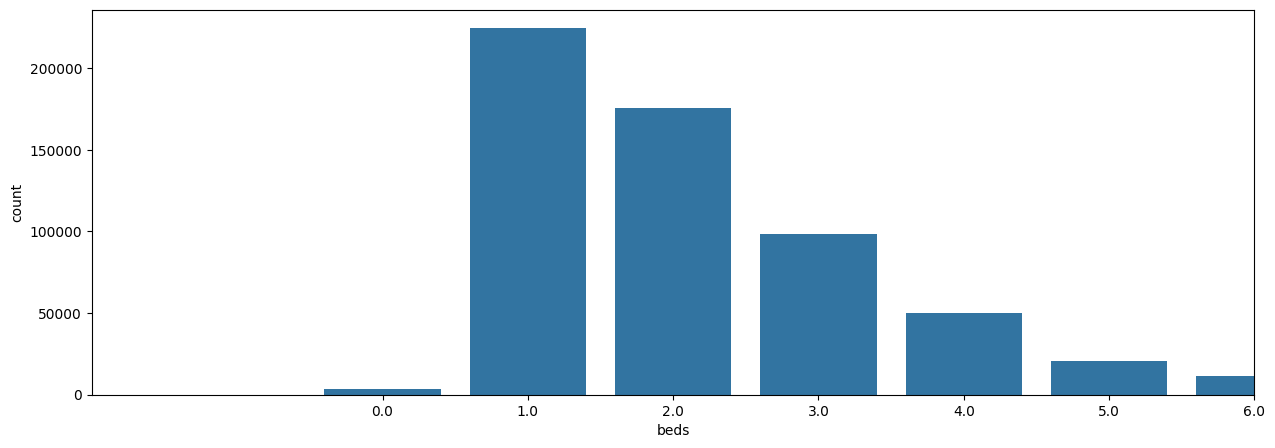

In [32]:
diagrama_caixa(base_airbnb['beds'])

grafico_barra(base_airbnb['beds'])

In [33]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print(f'{linhas_removidas} linhas foram removidas')

7695 linhas foram removidas


### Análise de **'guests_included':**

(1.0, 1.0)


<Axes: xlabel='guests_included', ylabel='count'>

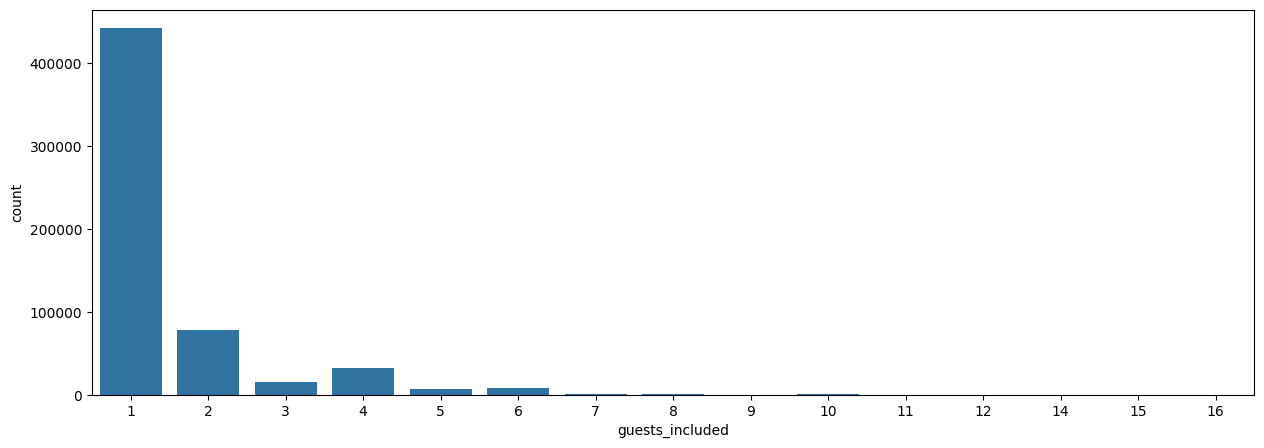

In [34]:
#diagrama_caixa(base_airbnb['guests_included'])

#grafico_barra(base_airbnb['guests_included'])

print(limites(base_airbnb['guests_included']))
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())

- Conclusão: Vamos remover a coluna de 'guests_included' da análise, pois não parece ser uma métrica boa e bem preenchida. Tem muitas linhas faltando, e não parece ser uma característica bem documentada pelos airbnb's.

### Análise de **'minimum_nights':**

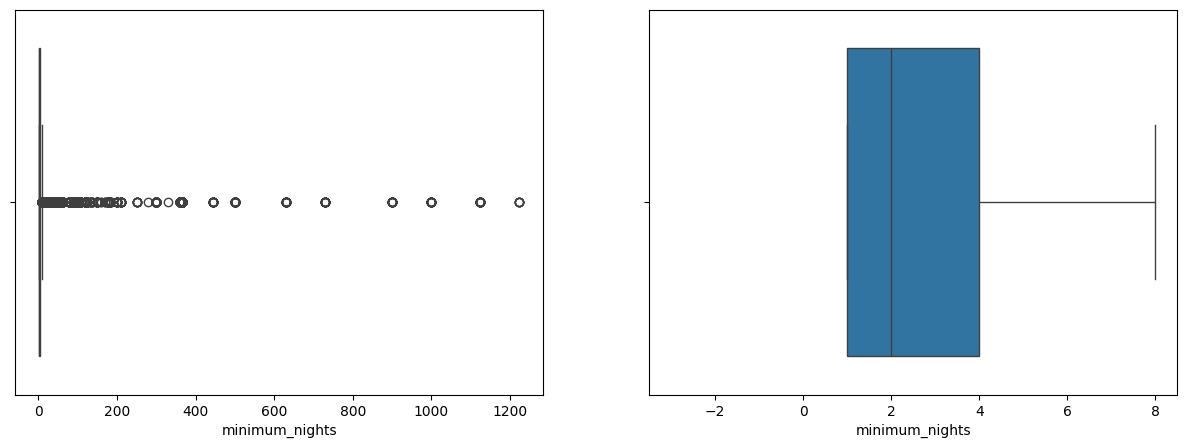

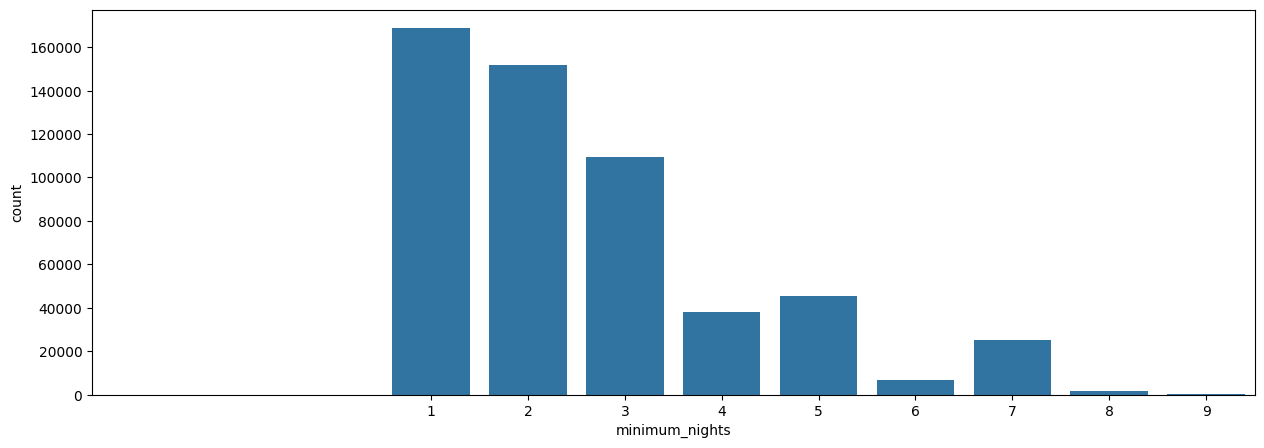

In [35]:
diagrama_caixa(base_airbnb['minimum_nights'])

grafico_barra(base_airbnb['minimum_nights'])

In [36]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print(f'{linhas_removidas} linhas foram removidas')

37619 linhas foram removidas


### Análise de **'maximum_nights':**

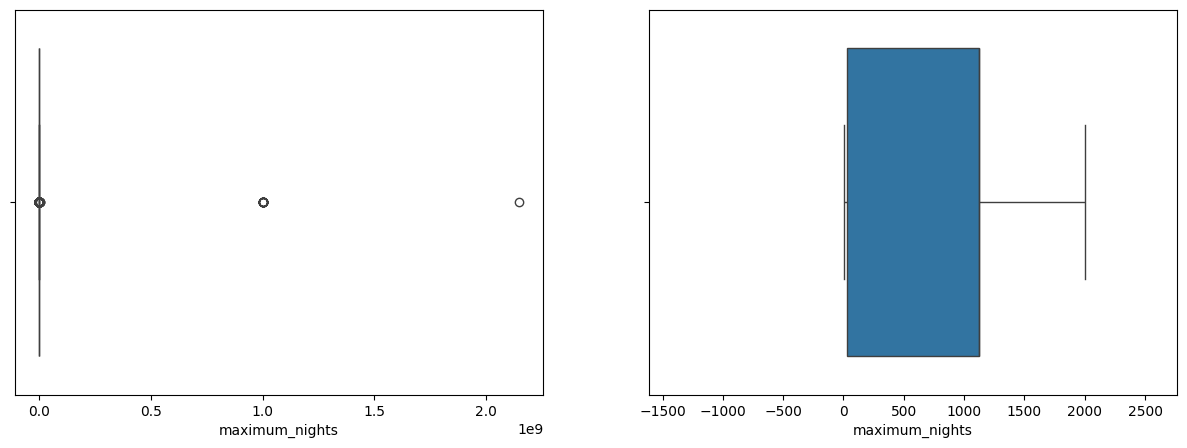

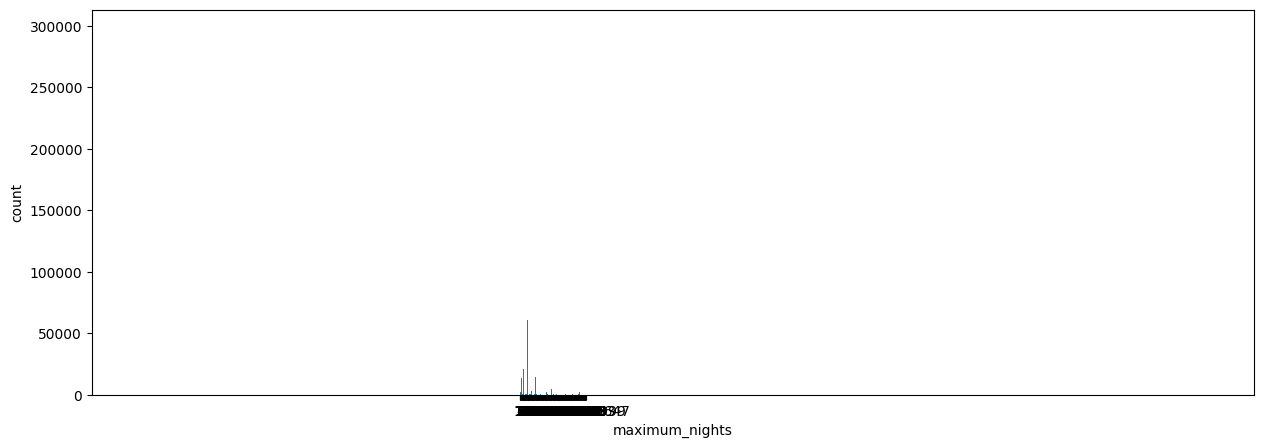

In [37]:
diagrama_caixa(base_airbnb['maximum_nights'])

grafico_barra(base_airbnb['maximum_nights'])

- Conclusão: também irei tirar a coluna 'maximum_nights', pois além de muitos airbnb's não preencherem o campo dessa característica, outros imóveis são alugados por vários meses. Sendo assim, além de ter muitos campos com '0', tem outros com '2000'. O que torna essa métrica ruim para fazer uma análise de preço.

### Análise de **'number_of_reviews':**

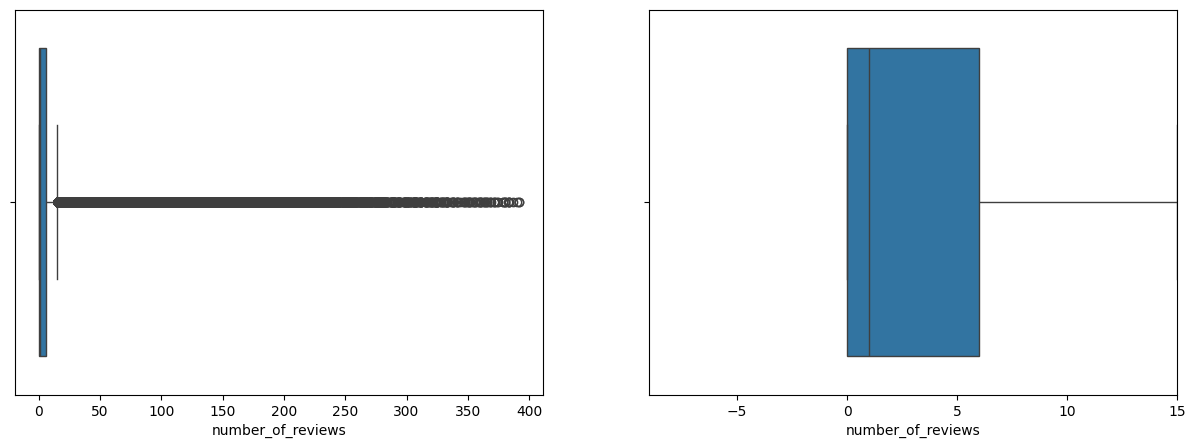

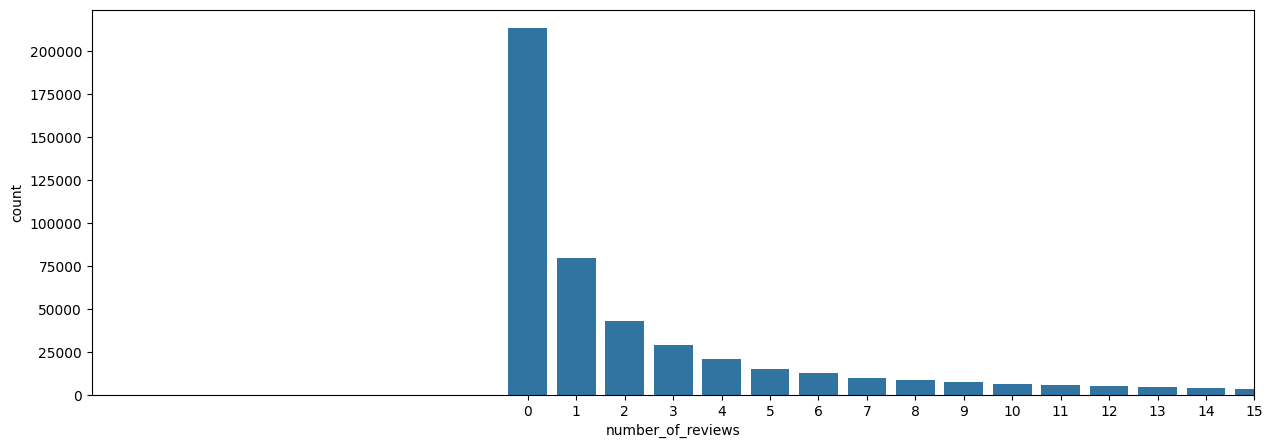

In [38]:
diagrama_caixa(base_airbnb['number_of_reviews'])

grafico_barra(base_airbnb['number_of_reviews'])

Vou tirar a métrica de número de reviews, pois meu público alvo são pessoas que nunca alugaram o seu imóvel antes, e que querem colocá-lo a venda. Então inicialmente o host vai ter 0 reviews.

## Tratamento de colunas com valores de texto

### property_type

property_type
Apartment                 440514
House                      39427
Condominium                24262
Serviced apartment         12244
Loft                       11772
Guest suite                 3247
Bed and breakfast           3235
Hostel                      2571
Guesthouse                  1827
Other                       1671
Villa                       1146
Townhouse                    816
Aparthotel                   661
Boutique hotel               440
Chalet                       410
Tiny house                   364
Hotel                        350
Earth house                  312
Casa particular (Cuba)       233
Bungalow                     178
Dorm                         154
Cottage                      130
Nature lodge                 103
Cabin                         74
Castle                        66
Island                        54
Treehouse                     51
Boat                          50
Campsite                      34
Resort                       

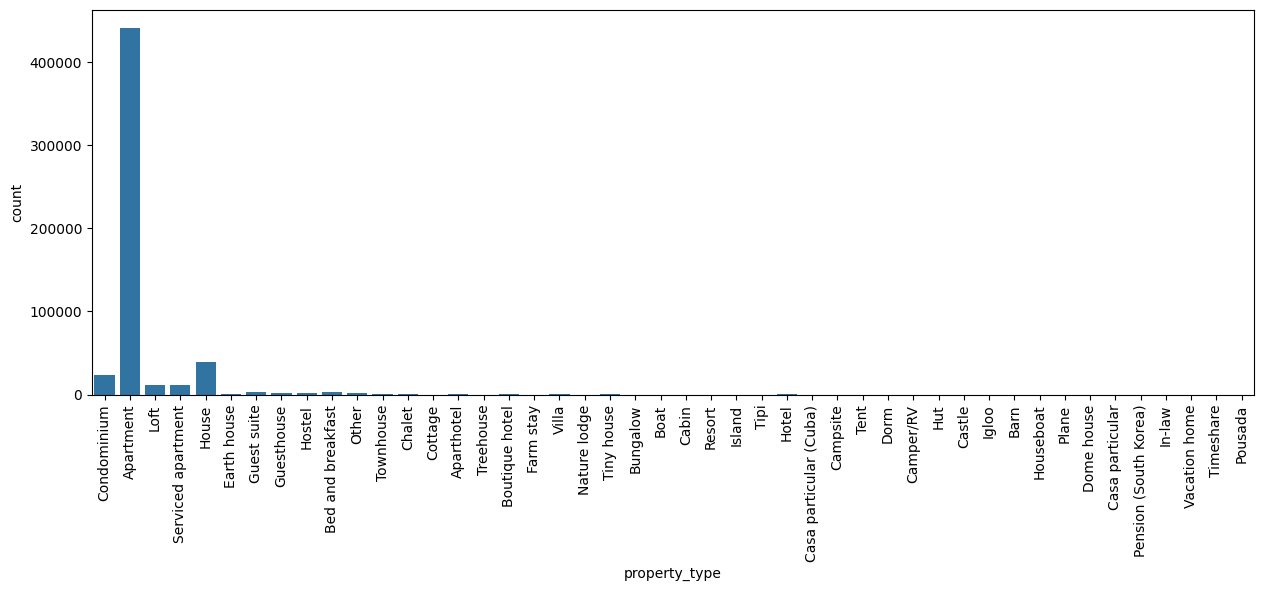

In [39]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

In [40]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
  if tabela_tipos_casa[tipo] < 1800:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['property_type'] == tipo, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Boutique hotel', 'Chalet', 'Tiny house', 'Hotel', 'Earth house', 'Casa particular (Cuba)', 'Bungalow', 'Dorm', 'Cottage', 'Nature lodge', 'Cabin', 'Castle', 'Island', 'Treehouse', 'Boat', 'Campsite', 'Resort', 'Camper/RV', 'Tent', 'Tipi', 'Hut', 'Barn', 'Farm stay', 'Dome house', 'Vacation home', 'In-law', 'Igloo', 'Houseboat', 'Pousada', 'Casa particular', 'Pension (South Korea)', 'Timeshare', 'Plane']
property_type
Apartment             440514
House                  39427
Condominium            24262
Serviced apartment     12244
Loft                   11772
Outros                  7458
Guest suite             3247
Bed and breakfast       3235
Hostel                  2571
Guesthouse              1827
Name: count, dtype: int64


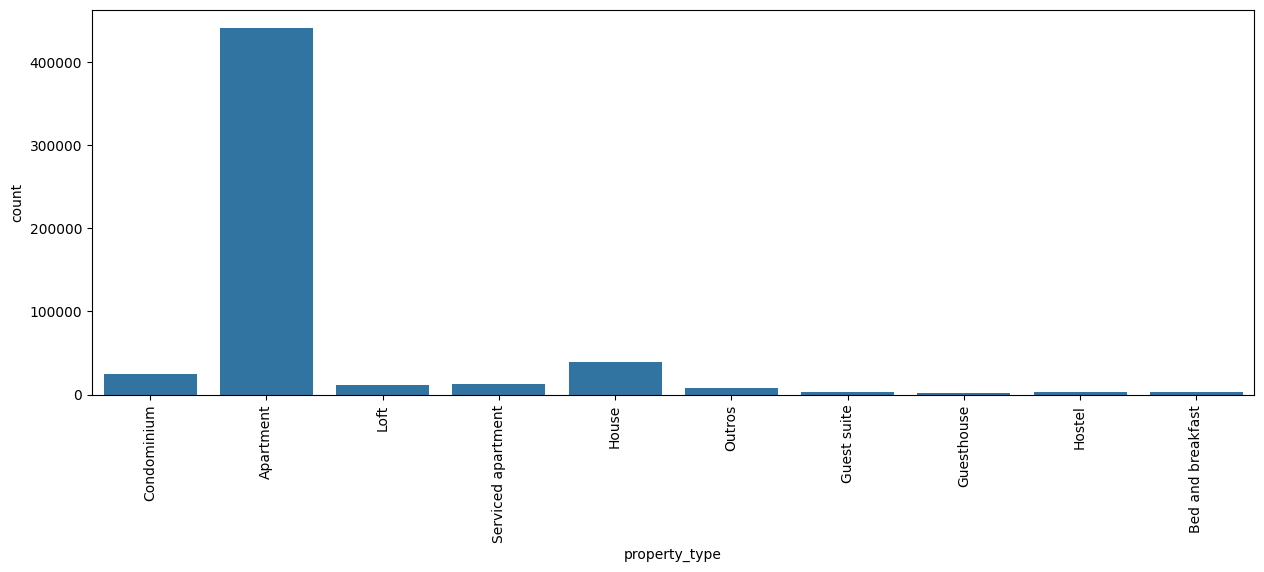

In [50]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### room_type

room_type
Entire home/apt    355462
Private room       179820
Shared room         10328
Hotel room            947
Name: count, dtype: int64


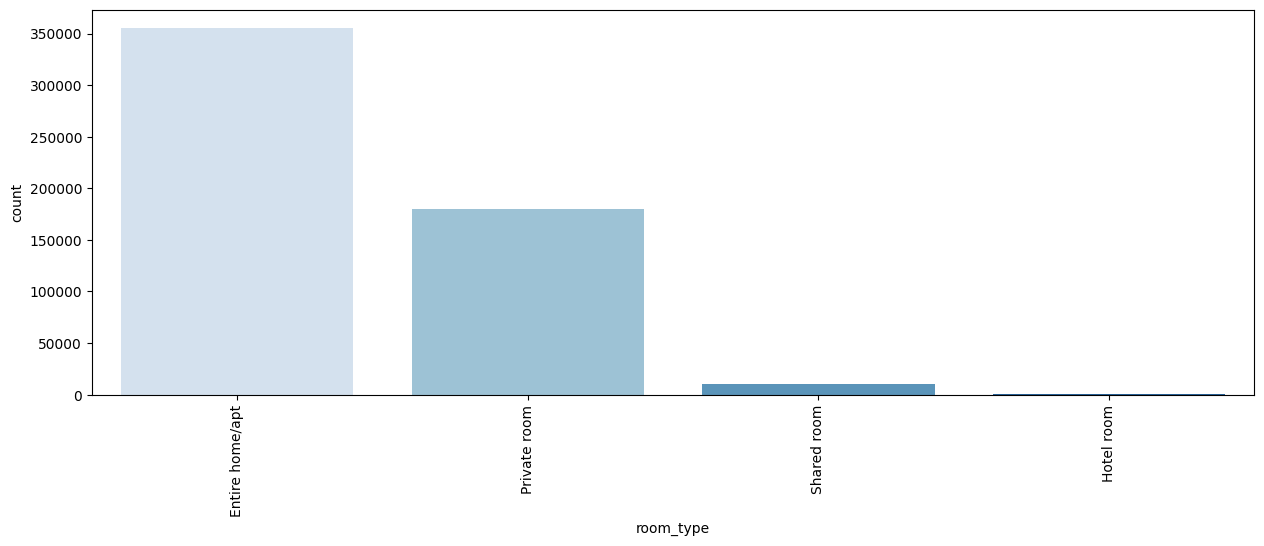

In [55]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='room_type', data=base_airbnb, palette='Blues')
grafico.tick_params(axis='x', rotation=90)

### bed_type

bed_type
Real Bed         535968
Pull-out Sofa      7483
Futon              1547
Airbed             1083
Couch               476
Name: count, dtype: int64


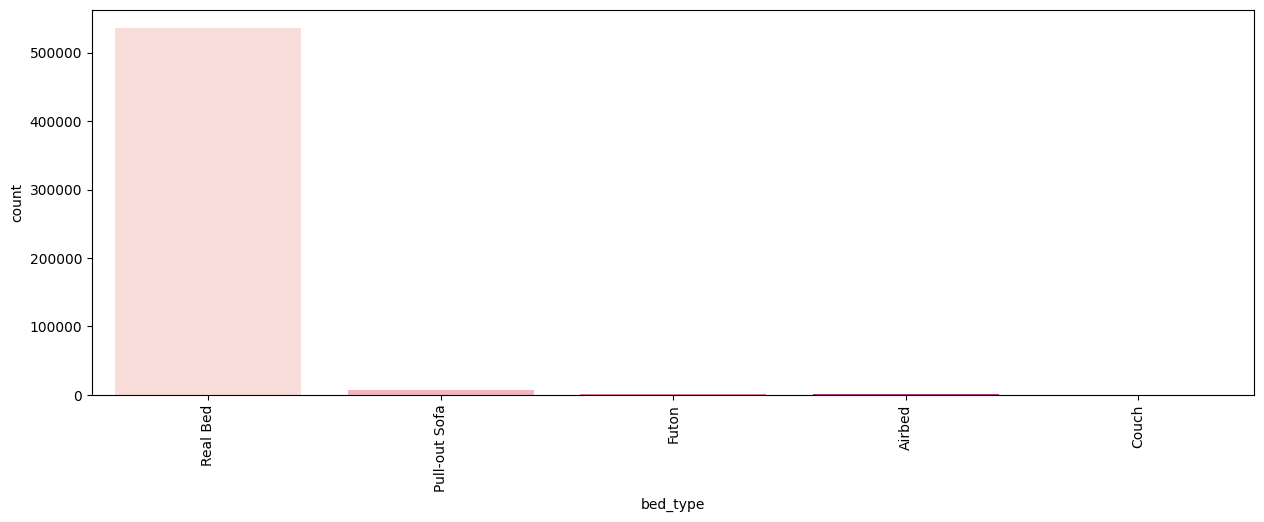

In [57]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='bed_type', data=base_airbnb, palette='RdPu')
grafico.tick_params(axis='x', rotation=90)

### cancellation_policy

cancellation_policy
flexible                       236079
strict_14_with_grace_period    193043
moderate                       107802
strict                           9466
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64


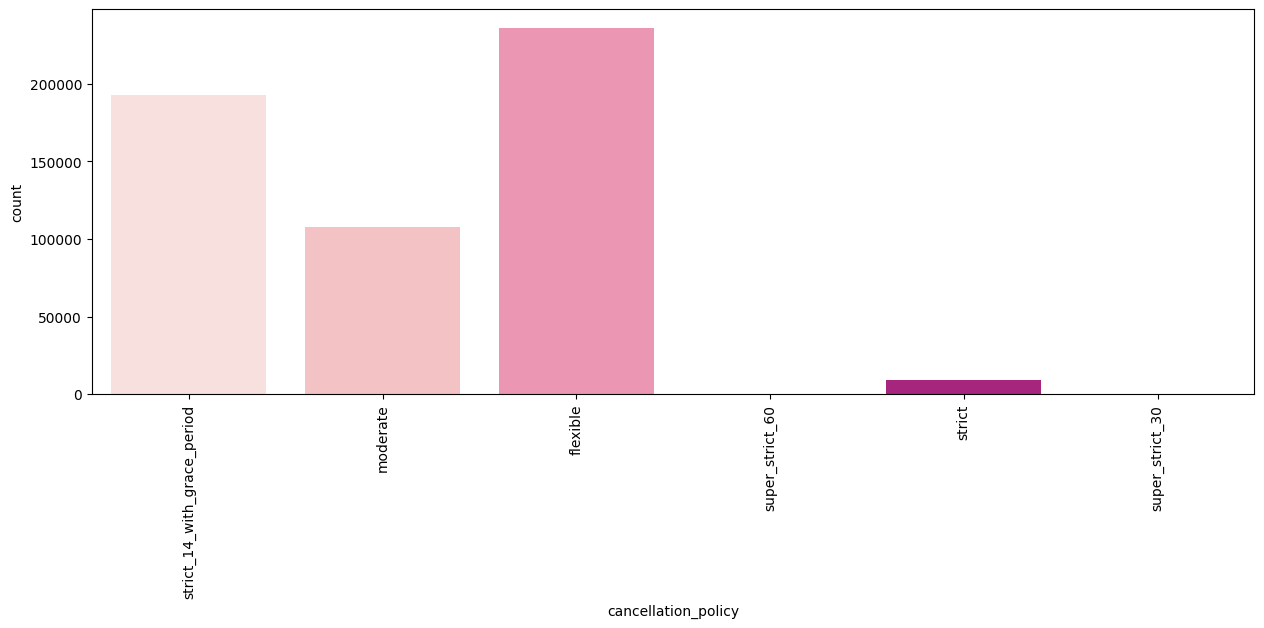

In [58]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb, palette='RdPu')
grafico.tick_params(axis='x', rotation=90)

### amenities

In [42]:
print(base_airbnb['amenities'].iloc[0].split(','))
print(len(base_airbnb['amenities'].iloc[0].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Building staff"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
25


In [43]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(546557, 23)

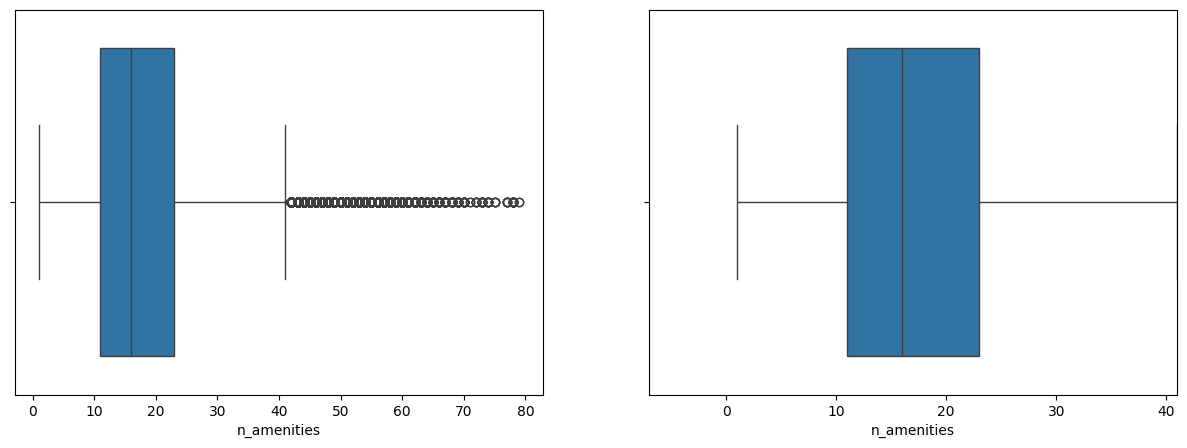

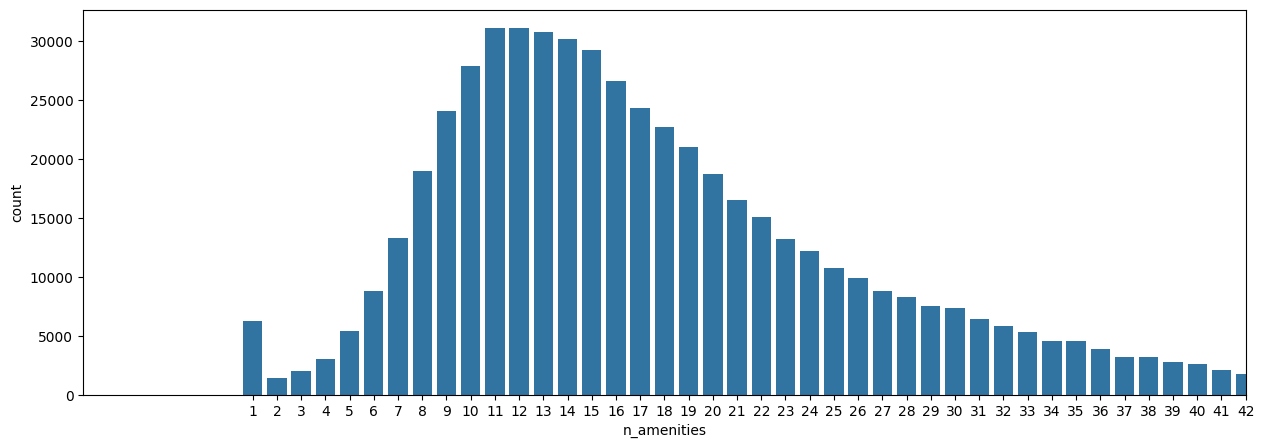

In [44]:
diagrama_caixa(base_airbnb['n_amenities'])

grafico_barra(base_airbnb['n_amenities'])

In [45]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenities')
print(f'{linhas_removidas} linhas foram removidas')

16146 linhas foram removidas


## Visualização de Mapa das Propriedades

In [51]:
import plotly.express as px

In [52]:
print(base_airbnb.shape)

(530411, 23)


In [ ]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat': amostra.latitude.mean(), 'lon': amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5, center=centro_mapa, zoom=10, mapbox_style='light')
mapa.show()

## Encoding

In [58]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()

for coluna in colunas_tf:
  base_airbnb_cod.loc[base_airbnb[coluna]=='t', coluna] = 1
  base_airbnb_cod.loc[base_airbnb[coluna]=='f', coluna] = 0
print(base_airbnb_cod.loc[0])

host_is_superhost                                     0
host_listings_count                                 2.0
neighbourhood                                Copacabana
latitude                                     -22.965919
longitude                                    -43.178962
property_type                               Condominium
room_type                               Entire home/apt
bathrooms                                           1.0
bedrooms                                            2.0
beds                                                2.0
bed_type                                       Real Bed
price                                             306.0
guests_included                                       2
extra_people                                       58.0
minimum_nights                                        4
maximum_nights                                       90
number_of_reviews                                   217
instant_bookable                                

In [59]:
colunas_categoria = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categoria)
display(base_airbnb_cod.head())

,host_is_superhost,host_listings_count,neighbourhood,latitude,longitude,bathrooms,bedrooms,beds,price,guests_included,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,0,2.0,Copacabana,-22.965919,-43.178962,1.0,2.0,2.0,306.0,2,...,False,False,False,True,False,False,False,True,False,False
2,0,3.0,Copacabana,-22.977117,-43.190454,1.0,1.0,2.0,159.0,2,...,False,False,False,True,False,False,False,True,False,False
3,1,1.0,Ipanema,-22.983024,-43.214270,1.0,1.0,2.0,252.0,2,...,False,False,False,True,False,False,False,True,False,False
5,1,1.0,Ipanema,-22.988165,-43.193588,1.5,1.0,2.0,348.0,2,...,False,False,False,True,False,False,False,True,False,False
6,1,1.0,Copacabana,-22.981269,-43.190457,1.0,1.0,2.0,221.0,2,...,False,False,False,True,False,False,False,True,False,False
